In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import sklearn
%matplotlib inline

In [46]:
text = pd.read_table("imdb_labelled.txt", sep = '\t', names = ['Review', 'Rating'])
amazon = pd.read_table("amazon_cells_labelled.txt", sep = '\t', names = ['Review', 'Rating'])
yelp = pd.read_table("yelp_labelled.txt", sep = '\t', names = ['Review', 'Rating'])
text.shape

(748, 2)

In [15]:
# Creating the keyword lists:

positive_keywords = ['love', 'liked', 'best', 'great', 'incredible', 'beautiful', 'cool', 'wonderful']
#negative_keywords = ['terrible', 'hated', 'bad', 'too', 'awful', 'slow', 'bore', 'boring']

In [16]:
# Applying those lists to the text of the reviews:

for key in positive_keywords:
    text[str(key)] = text.Review.str.contains(
    ' ' + str(key) + ' ',
        case = False)
    
# for key in negative_keywords:
#     text[str(key)] = text.Review.str.contains(
#     ' ' + str(key) + ' ',
#         case = False)

In [17]:
# Changing the Rating column so it contains boolean values:

text['Rating'] = (text['Rating'] == 1)

In [18]:
# Setting the data and target columns:

data = text[positive_keywords]
target = text['Rating']

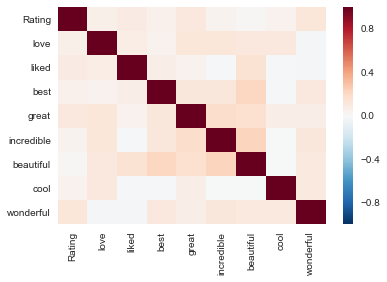

In [19]:
sns.heatmap(text.corr())
plt.show()

In [30]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of total columns: {}.  Number of mislabeled columns: {}".format(
        data.shape[0],
        (target != y_pred).sum()))

Number of total columns: 748.  Number of mislabeled columns: 329


In [35]:
TN = ((text['Rating'] == False) & (y_pred == False)).sum()
FP = ((text['Rating'] == False) & (y_pred == True)).sum()
TP = ((text['Rating'] == True) & (y_pred == True)).sum()
FN = ((text['Rating'] == True) & (y_pred == False)).sum()

In [40]:
matrix = [[TN, FP],
           [FN, TP]]
matrix

[[350, 12], [317, 69]]

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[350,  12],
       [317,  69]])

In [54]:
# Percentage of positives correctly identified:

sensitivity = (TP/(FN+TP))
# Percentage of negatives correctly identified:

specificity = (TN/(TN+FP))

print("The Sensitivity is {:.2%}. The Specificity is {:.2%}.".format(sensitivity, specificity))

The Sensitivity is 17.88%. The Specificity is 96.69%.


In [51]:
target.value_counts()

True     386
False    362
Name: Rating, dtype: int64